##### $\hspace{15pt}$ **Filename: autoML1of2.ipynb**
##### $\hspace{1.5pt}$ **Date Created: October 17, 2023**
##### **Date Modified: November 4, 2024**
##### $\rule{10.5in}{1pt}$
##### **Train and test predictive models on the [heart disease prediction dataset](https://www.kaggle.com/datasets/moazeldsokyx/heart-disease) from Kaggle using the following AutoML libraries:**
* **[AutoGluon](https://auto.gluon.ai/stable/index.html)**
* **[auto-sklearn](https://automl.github.io/auto-sklearn/master/index.html#)**
* **[H2O AutoML](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)**
* **[PyCaret](https://pycaret.org/)**
* **[TPOT](https://epistasislab.github.io/tpot/)**

##### **The files `train.csv` and `test.csv` that have to be accessed are available in this [Google Drive folder](https://drive.google.com/drive/folders/1zCquV8n3icIkPQ4pSwB5oZWvp1zvAz64?usp=sharing). The `pkl` and `zip` files and the `autoGluonBestModel` subfolder in the folder are created when the notebook is run.**

##### **Before running this notebook in Colab, either change the path to access the `csv` files, or create the subfolder `/Colab Notebooks/003_autoML` in your Google drive and copy the two `csv` files to the subfolder. Restart the runtime after installing the packages and before running the remaining cells of the notebook.**

##### $\rule{10.5in}{1pt}$

##### Install `autogluon`.

In [1]:
!pip install autogluon -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.8/234.8 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 428.0/428.0 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.1/312.1 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━

##### Install `dython`.

In [2]:
!pip install dython -q

##### Install `h2o`.

In [3]:
!apt-get install default-jre
!java -version
!pip install h2o -q

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 49 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com

##### Install `pycaret`.

In [4]:
!pip install pycaret[full] -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

##### Install `tpot`.

In [5]:
!pip install tpot -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.6 MB/s eta 0:00:00


##### Update `seaborn`.

In [6]:
!pip install -U seaborn -q

##### Restart the runtime, and load modules and packages.

In [1]:
from autogluon.tabular import TabularPredictor
from dython.nominal import associations
from google.colab import drive
from pycaret.classification import *
from sklearn import metrics
from sklearn.inspection import permutation_importance
from tpot import TPOTClassifier
import h2o
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns

##### Set pandas dataframes to display all the columns.

In [2]:
pd.set_option("display.max_columns", None)

##### Set the float format of pandas dataframes.

In [3]:
pd.options.display.float_format = "{:.4f}".format

##### Mount Google Drive to Colab.

In [4]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


##### Set the path to access the files needed by this notebook.

In [5]:
path = "gdrive/MyDrive/Colab Notebooks/003_autoML/"

##### Load the train and test sets from Google Drive.

In [6]:
trainSet = pd.read_csv(path + "train.csv")
trainSet.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0   1.0000      2   
1   53    1   0       140   203    1        0      155      1   3.1000      0   
2   70    1   0       145   174    0        1      125      1   2.6000      0   
3   61    1   0       148   203    0        1      161      0   0.0000      2   
4   62    0   0       138   294    1        1      106      0   1.9000      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [7]:
testSet = pd.read_csv(path + "test.csv")
testSet.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0   2.3000      0   
1   37    1   2       130   250    0        1      187      0   3.5000      0   
2   41    0   1       130   204    0        0      172      0   1.4000      2   
3   56    1   1       120   236    0        1      178      0   0.8000      2   
4   57    0   0       120   354    0        1      163      1   0.6000      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

##### Check if there are missing values.

In [8]:
trainSet.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
testSet.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##### Visualize the continuous features in the train set.

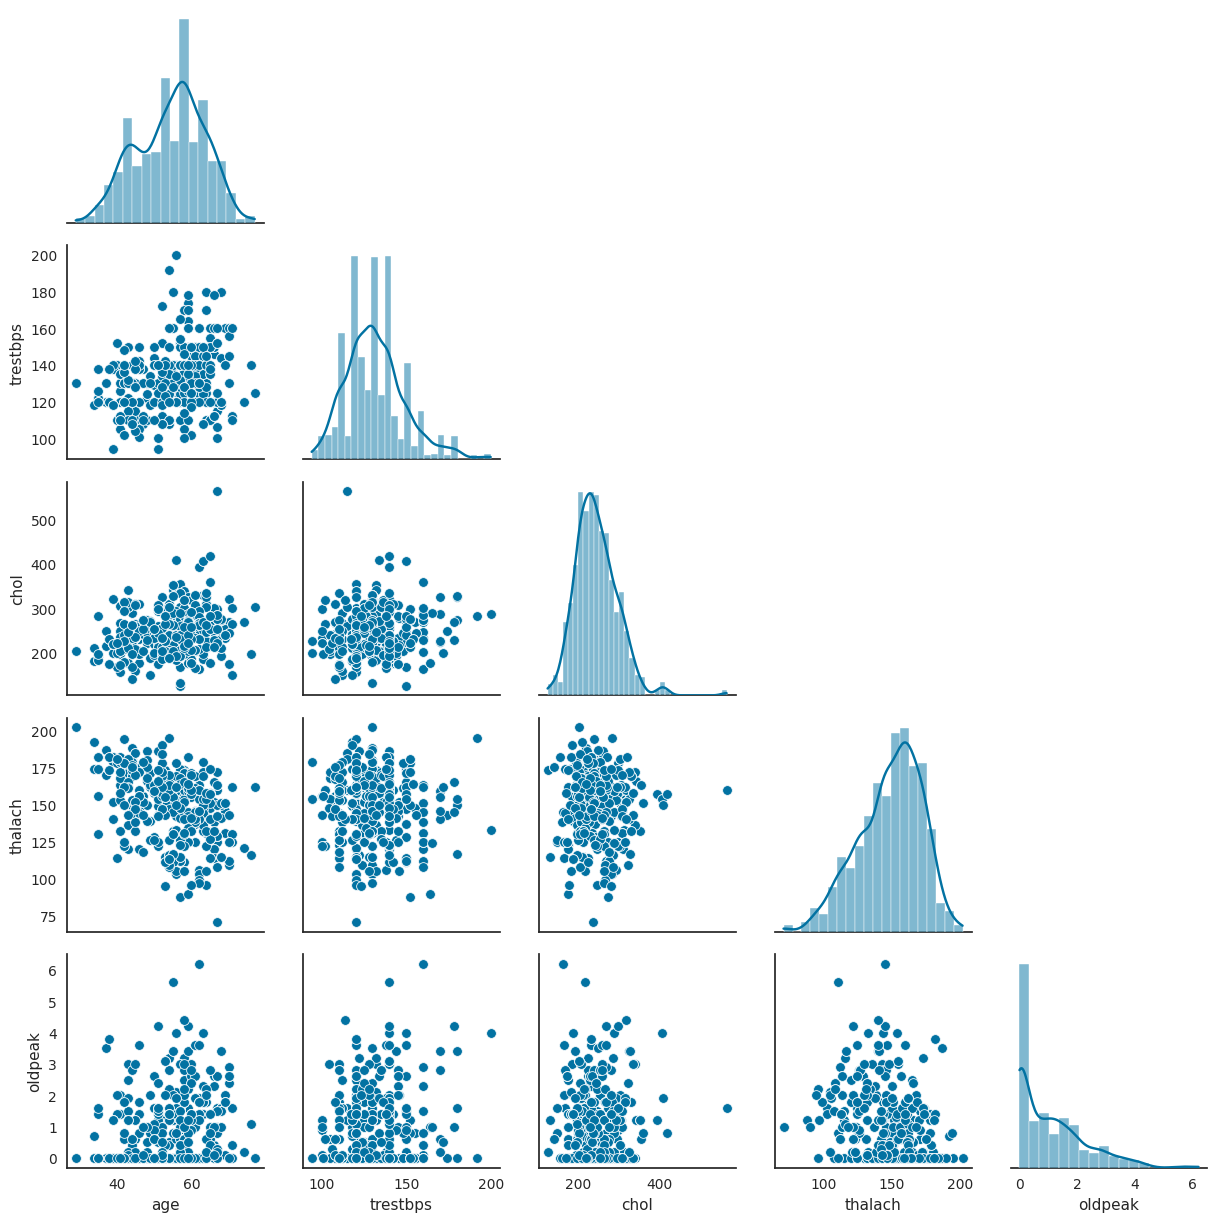

In [10]:
sns.set_style("white")
grid = sns.PairGrid(trainSet, vars = ["age", "trestbps", "chol", "thalach", "oldpeak"], corner = True, diag_sharey = False)
grid.map_diag(sns.histplot, stat = "percent", kde = True)
grid.map_lower(sns.scatterplot)
plt.show()

##### Visualize the categorical features in the train set.

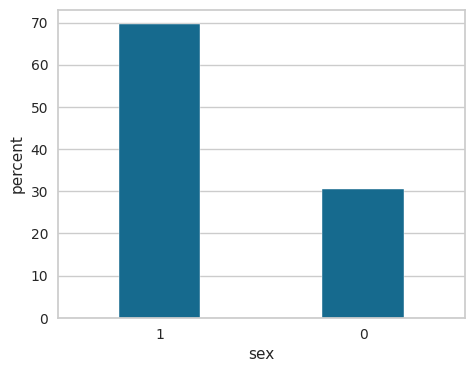

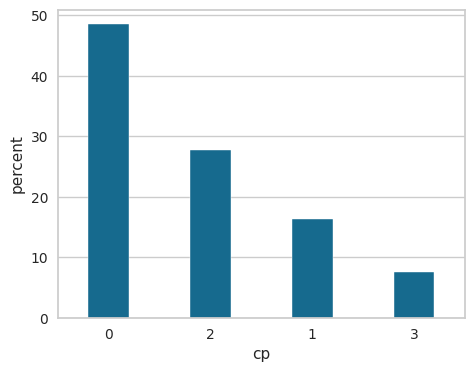

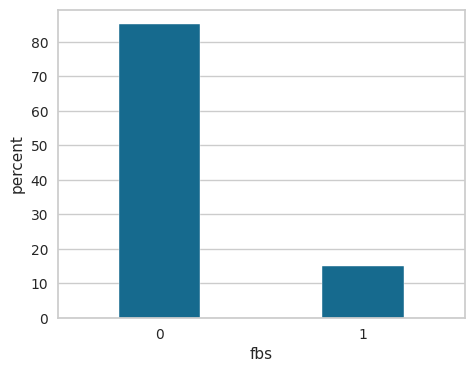

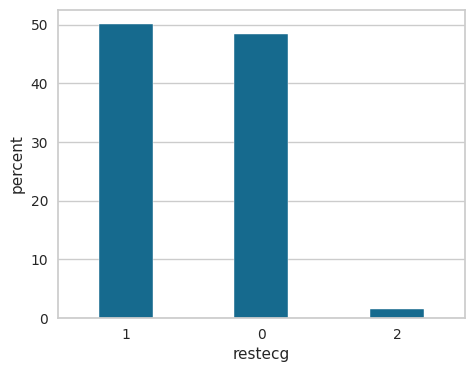

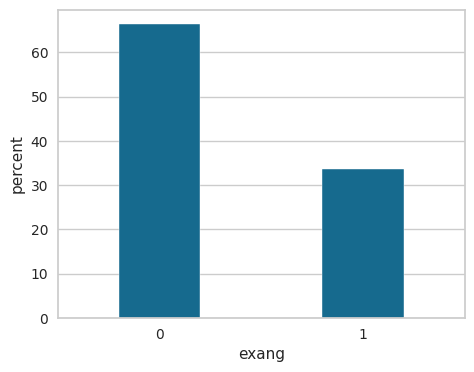

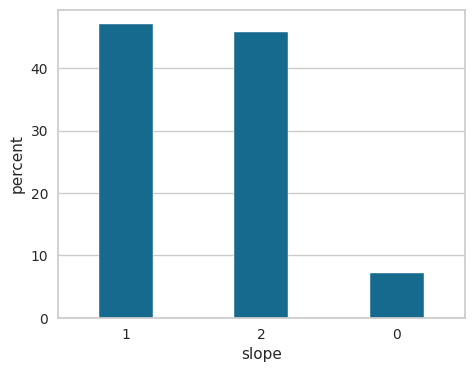

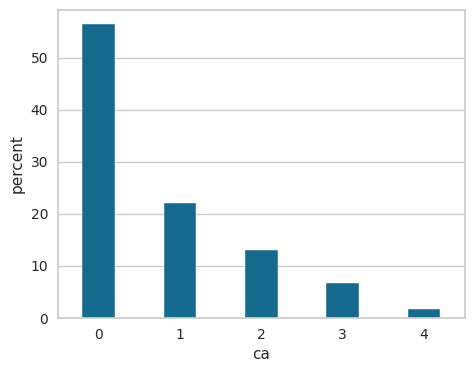

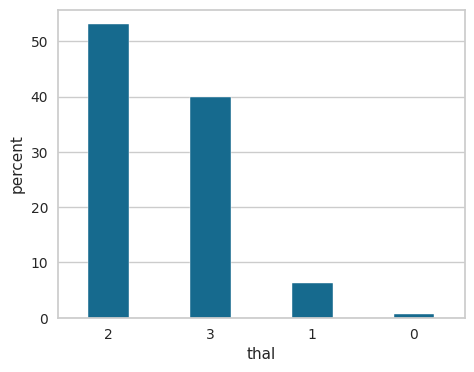

In [11]:
plt.rcParams["figure.figsize"] = [5.25, 4]
sns.set_style("whitegrid")

categoricalFeatures = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

for feature in categoricalFeatures:

    valueCounts = trainSet[feature].value_counts()
    categoricalLevels = valueCounts.index.tolist()
    sns.countplot(data = trainSet, x = feature, order = categoricalLevels, stat = "percent", width = 0.4)
    plt.show()
    print("")
    print("")
    print("")

##### Visualize the target in the train set.

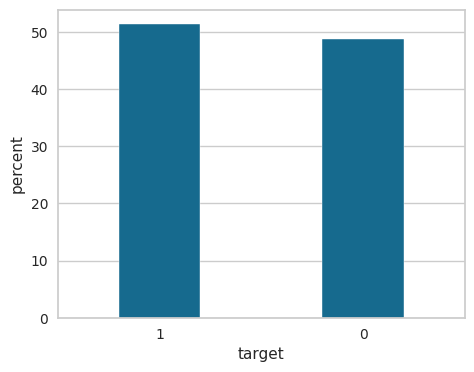

In [12]:
valueCounts = trainSet["target"].value_counts()
categoricalLevels = valueCounts.index.tolist()
sns.countplot(data = trainSet, x = "target", order = categoricalLevels, stat = "percent", width = 0.4)
plt.show()

##### Create a correlation heatmap using the variables in the train set.

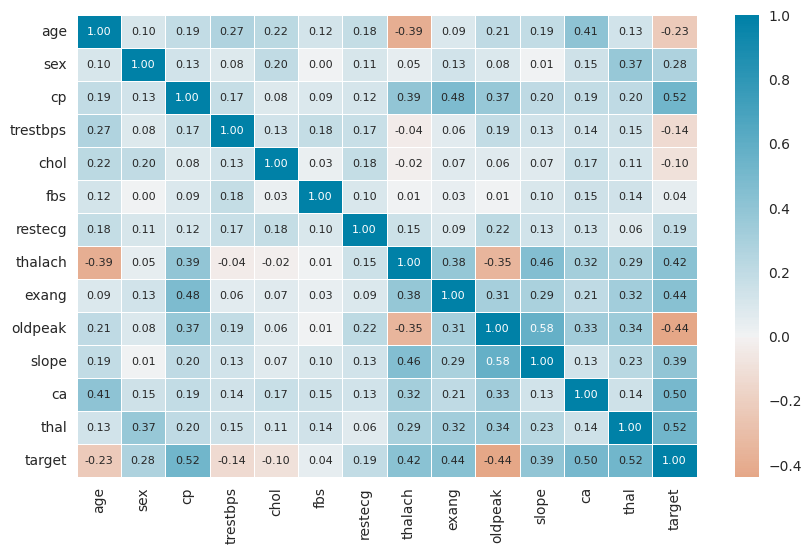

In [13]:
plt.figure(figsize = (10, 6))
correlationMatrix = associations(trainSet, nominal_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"],
                                 compute_only = True)["corr"]
cmap = sns.diverging_palette(20, 230, s = 100, as_cmap = True)
sns.heatmap(correlationMatrix, cmap = cmap, center = 0, annot = True, annot_kws = {"fontsize": 8}, fmt = ".2f", linewidths = 0.5)
plt.show()

$\hspace{1in}$

<a name="0"></a>
The following list contains links to the sections of this notebook that demonstrate an implementation of the AutoML libraries using the loaded train and test sets.
* **[AutoGluon](#1)**
* **[auto-sklearn](https://colab.research.google.com/drive/1q1BLfBKZM_XzOT3UhqptbR0RxwMp1xzG?usp=drive_link)**
* **[H2O AutoML](#2)**
* **[PyCaret](#3)**
* **[TPOT](#4)**

$\hspace{1in}$

<a name="1"></a>
##### **AutoGluon**

##### Check the data types of the variables in the train and test sets.

In [14]:
trainSet.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [15]:
testSet.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

##### Explicitly treat the nonbinary categorical features as categorical.

In [16]:
nonBinaryCategoricalFeatures = ["cp", "restecg", "thal"]
trainSet[nonBinaryCategoricalFeatures] = trainSet[nonBinaryCategoricalFeatures].astype("category")
testSet[nonBinaryCategoricalFeatures] = testSet[nonBinaryCategoricalFeatures].astype("category")

##### Note: Numeric or non-numeric variables with only 2 unique values are automatically treated as boolean by `AutoGluon`.

##### Check again the data types of the variables in the train and test sets.

In [17]:
trainSet.dtypes

age            int64
sex            int64
cp          category
trestbps       int64
chol           int64
fbs            int64
restecg     category
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal        category
target         int64
dtype: object

In [18]:
testSet.dtypes

age            int64
sex            int64
cp          category
trestbps       int64
chol           int64
fbs            int64
restecg     category
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal        category
target         int64
dtype: object

##### Train models.

In [19]:
models = TabularPredictor(label = "target", eval_metric = "roc_auc", path = path + "autoGluonBestModel").fit(trainSet)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.55 GB / 12.67 GB (83.2%)
Disk Space Avail:   2.96 GB / 15.00 GB (19.7%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_qua

[1000]	valid_set's binary_logloss: 0.00104699
[2000]	valid_set's binary_logloss: 3.3974e-05
[3000]	valid_set's binary_logloss: 1.81185e-05
[4000]	valid_set's binary_logloss: 1.47173e-05
[5000]	valid_set's binary_logloss: 1.30583e-05
[6000]	valid_set's binary_logloss: 1.2286e-05
[7000]	valid_set's binary_logloss: 1.1325e-05
[8000]	valid_set's binary_logloss: 1.07813e-05
[9000]	valid_set's binary_logloss: 1.04285e-05
[10000]	valid_set's binary_logloss: 1.01722e-05


	1.0	 = Validation score   (roc_auc)
	5.23s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's binary_logloss: 0.000127724
[2000]	valid_set's binary_logloss: 8.59297e-05


	1.0	 = Validation score   (roc_auc)
	1.05s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestGini ...
	1.0	 = Validation score   (roc_auc)
	0.88s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: RandomForestEntr ...
	1.0	 = Validation score   (roc_auc)
	0.85s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: CatBoost ...
	1.0	 = Validation score   (roc_auc)
	163.42s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	1.0	 = Validation score   (roc_auc)
	0.85s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	1.0	 = Validation score   (roc_auc)
	0.87s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	1.0	 = Validation score   (roc_auc)
	2.84s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: XGBoost ...
	1.0	 = Validation score   (roc_auc)
	6.07s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting 

[1000]	valid_set's binary_logloss: 9.46171e-05


	1.0	 = Validation score   (roc_auc)
	2.23s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'ExtraTreesGini': 1.0}
	1.0	 = Validation score   (roc_auc)
	0.17s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 198.66s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 2251.4 rows/s (205 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("gdrive/MyDrive/Colab Notebooks/003_autoML/autoGluonBestModel")


##### Display all the trained models.

In [20]:
models.leaderboard()

model  score_val eval_metric  pred_time_val  fit_time  \
0              CatBoost     1.0000     roc_auc         0.0081  163.4205   
1        KNeighborsDist     1.0000     roc_auc         0.0126    0.0208   
2        NeuralNetTorch     1.0000     roc_auc         0.0211   10.5724   
3       NeuralNetFastAI     1.0000     roc_auc         0.0262    2.8426   
4              LightGBM     1.0000     roc_auc         0.0363    1.0523   
5         LightGBMLarge     1.0000     roc_auc         0.0466    2.2344   
6               XGBoost     1.0000     roc_auc         0.0656    6.0678   
7        ExtraTreesEntr     1.0000     roc_auc         0.0891    0.8697   
8      RandomForestGini     1.0000     roc_auc         0.0893    0.8752   
9        ExtraTreesGini     1.0000     roc_auc         0.0903    0.8452   
10  WeightedEnsemble_L2     1.0000     roc_auc         0.0911    1.0103   
11           LightGBMXT     1.0000     roc_auc         0.1660    5.2313   
12     RandomForestEntr     1.0000     roc_auc         0.0898    0.8470   
13       KNeighborsUnif     0.8723     roc_auc         0.0065    0.3425   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                   0.0081           163.4205            1       True   
1                   0.0126             0.0208            1       True   
2                   0.0211            10.5724            1       True   
3                   0.0262             2.8426            1       True   
4                   0.0363             1.0523            1       True   
5                   0.0466             2.2344            1       True   
6                   0.0656             6.0678            1       True   
7                   0.0891             0.8697            1       True   
8                   0.0893             0.8752            1       True   
9                   0.0903             0.8452            1       True   
10                  0.0008             0.1651            2       True   
11                  0.1660             5.2313            1       True   
12                  0.0898             0.8470            1       True   
13                  0.0065             0.3425            1       True   

    fit_order  
0           7  
1           2  
2          12  
3          10  
4           4  
5          13  
6          11  
7           9  
8           5  
9           8  
10         14  
11          3  
12          6  
13          1

##### Identify the best model.

In [21]:
models.model_best

'WeightedEnsemble_L2'

##### Predict on test set.

In [22]:
xTest = testSet.drop(columns = ["target"])
predictionLabels = models.predict(xTest)
predictionScores = models.predict_proba(xTest)[1]

testSetPredictions = xTest.copy()
testSetPredictions["prediction_label"] = predictionLabels
testSetPredictions["prediction_score"] = predictionScores
testSetPredictions.head()

age  sex cp  trestbps  chol  fbs restecg  thalach  exang  oldpeak  slope  \
0   63    1  3       145   233    1       0      150      0   2.3000      0   
1   37    1  2       130   250    0       1      187      0   3.5000      0   
2   41    0  1       130   204    0       0      172      0   1.4000      2   
3   56    1  1       120   236    0       1      178      0   0.8000      2   
4   57    0  0       120   354    0       1      163      1   0.6000      2   

   ca thal  prediction_label  prediction_score  
0   0    1                 1            0.9433  
1   0    2                 1            0.6067  
2   0    2                 1            0.9933  
3   0    2                 1            1.0000  
4   0    2                 1            0.9900

##### Plot confusion matrix.

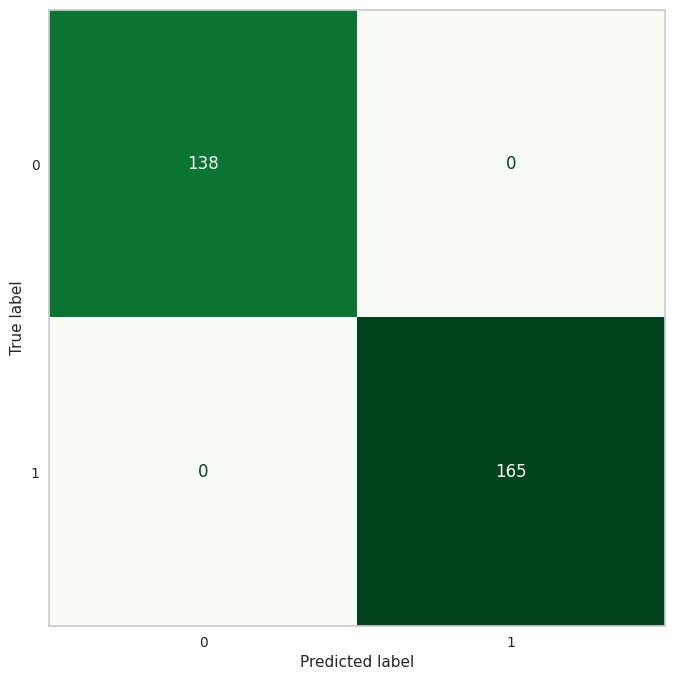

In [23]:
yTest = testSet["target"]
yPred = testSetPredictions["prediction_label"]
confusionMatrix = metrics.confusion_matrix(yTest, yPred)

plt.rcParams["figure.figsize"] = [12, 8]
display = metrics.ConfusionMatrixDisplay(confusionMatrix)
display.plot(cmap = plt.cm.Greens, colorbar = False)
plt.grid(None)
plt.show()

##### Plot ROC curve.

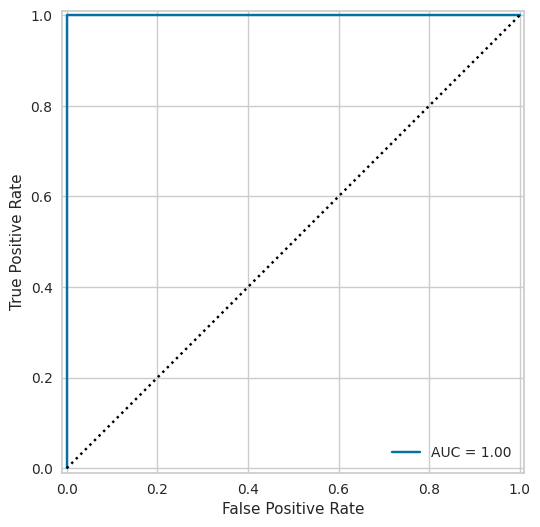

In [24]:
plt.rcParams["figure.figsize"] = [8, 6]
fpr, tpr, thresholds = metrics.roc_curve(yTest, predictionScores)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc)
display.plot()
plt.plot([0, 1], [0, 1], linestyle = "dotted", color = "black")
plt.show()

##### Calculate feature importance scores via permutation shuffling.

In [25]:
featureImportanceScores = models.feature_importance(testSet)
featureImportanceScores

Computing feature importance via permutation shuffling for 13 features using 303 rows with 5 shuffle sets...
	11.26s	= Expected runtime (2.25s per shuffle set)
	1.1s	= Actual runtime (Completed 5 of 5 shuffle sets)


importance  stddev  p_value  n  p99_high  p99_low
cp            0.0086  0.0030   0.0015  5    0.0147   0.0024
ca            0.0085  0.0012   0.0000  5    0.0110   0.0060
exang         0.0072  0.0028   0.0022  5    0.0129   0.0015
sex           0.0066  0.0048   0.0180  5    0.0165  -0.0032
thal          0.0035  0.0013   0.0021  5    0.0062   0.0007
slope         0.0010  0.0003   0.0009  5    0.0017   0.0004
restecg       0.0006  0.0003   0.0061  5    0.0012  -0.0000
age           0.0001  0.0001   0.0223  5    0.0003  -0.0001
thalach       0.0001  0.0001   0.0758  5    0.0004  -0.0002
oldpeak       0.0001  0.0001   0.1392  5    0.0003  -0.0002
chol          0.0001  0.0000   0.0081  5    0.0002  -0.0000
trestbps      0.0001  0.0001   0.1040  5    0.0002  -0.0001
fbs           0.0000  0.0000   0.5000  5    0.0000   0.0000

##### Plot the feature importance scores.

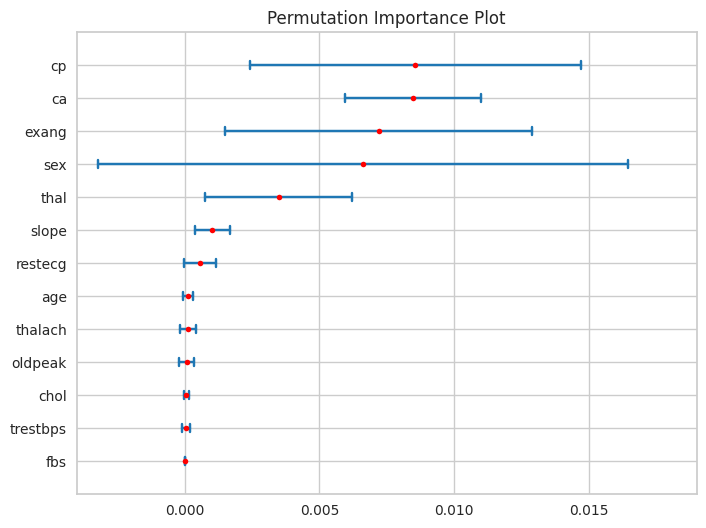

In [26]:
features = featureImportanceScores.index.tolist()
indexes = list(range(1, len(features) + 1))
indexes.reverse()

print("")
print("")

def plotConfidenceInterval(x, estimate, lower, upper):
    "Plot a confidence interval."

    bottom = x - 0.125
    top = x + 0.125

    plt.plot([lower, upper], [x, x], color = "tab:blue")
    plt.plot([lower, lower], [bottom, top], color = "tab:blue")
    plt.plot([upper, upper], [bottom, top] , color = "tab:blue")
    plt.plot(estimate, x, 'o', markersize = 4, color = "red")

for i, j in zip(indexes, features):
    plotConfidenceInterval(i, featureImportanceScores.loc[j, "importance"], featureImportanceScores.loc[j, "p99_low"],
                           featureImportanceScores.loc[j, "p99_high"])

plt.xlim([-0.004, 0.019])
plt.ylim([0, 14])
plt.yticks(indexes, features)
plt.title("Permutation Importance Plot")
plt.show()

##### Delete all trained models except the best model and its dependencies.

In [27]:
models.delete_models(models_to_keep = models.model_best, dry_run = False)

Deleting model KNeighborsUnif. All files under gdrive/MyDrive/Colab Notebooks/003_autoML/autoGluonBestModel/models/KNeighborsUnif will be removed.
Deleting model KNeighborsDist. All files under gdrive/MyDrive/Colab Notebooks/003_autoML/autoGluonBestModel/models/KNeighborsDist will be removed.
Deleting model LightGBMXT. All files under gdrive/MyDrive/Colab Notebooks/003_autoML/autoGluonBestModel/models/LightGBMXT will be removed.
Deleting model LightGBM. All files under gdrive/MyDrive/Colab Notebooks/003_autoML/autoGluonBestModel/models/LightGBM will be removed.
Deleting model RandomForestGini. All files under gdrive/MyDrive/Colab Notebooks/003_autoML/autoGluonBestModel/models/RandomForestGini will be removed.
Deleting model RandomForestEntr. All files under gdrive/MyDrive/Colab Notebooks/003_autoML/autoGluonBestModel/models/RandomForestEntr will be removed.
Deleting model CatBoost. All files under gdrive/MyDrive/Colab Notebooks/003_autoML/autoGluonBestModel/models/CatBoost will be remo

##### Load best model and its dependencies.

In [28]:
bestModel = TabularPredictor.load(models.path)

In [29]:
bestModel.leaderboard()

model  score_val eval_metric  pred_time_val  fit_time  \
0       ExtraTreesGini     1.0000     roc_auc         0.0903    0.8452   
1  WeightedEnsemble_L2     1.0000     roc_auc         0.0911    1.0103   

   pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                  0.0903             0.8452            1       True   
1                  0.0008             0.1651            2       True   

   fit_order  
0          1  
1          2

Back to the list of [**section links**](#0)

$\hspace{1in}$

<a name="2"></a>
##### **H2O AutoML**

##### Start the H2O cluster.

In [30]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.24" 2024-07-16; OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04); OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmplh5jfgds
  JVM stdout: /tmp/tmplh5jfgds/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmplh5jfgds/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         06 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.6
H2O_cluster_version_age:    1 day
H2O_cluster_name:           H2O_from_python_unknownUser_oq2gwv
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

##### Convert each of the train and test sets to an H2OFrame.

In [31]:
h2oTrainSet = h2o.H2OFrame(trainSet)
h2oTestSet = h2o.H2OFrame(testSet)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


##### Check the data types of the variables in the train and test sets.

In [32]:
h2oTrainSet.types

{'age': 'int',
 'sex': 'int',
 'cp': 'int',
 'trestbps': 'int',
 'chol': 'int',
 'fbs': 'int',
 'restecg': 'int',
 'thalach': 'int',
 'exang': 'int',
 'oldpeak': 'real',
 'slope': 'int',
 'ca': 'int',
 'thal': 'int',
 'target': 'int'}

In [33]:
h2oTestSet.types

{'age': 'int',
 'sex': 'int',
 'cp': 'int',
 'trestbps': 'int',
 'chol': 'int',
 'fbs': 'int',
 'restecg': 'int',
 'thalach': 'int',
 'exang': 'int',
 'oldpeak': 'real',
 'slope': 'int',
 'ca': 'int',
 'thal': 'int',
 'target': 'int'}

##### Convert each categorical variable to a factor.

In [34]:
categoricalVariables = ["sex", "cp", "fbs", "restecg", "exang", "thal", "target"]

h2oTrainSet[categoricalVariables] = h2oTrainSet[categoricalVariables].asfactor()
h2oTestSet[categoricalVariables] = h2oTestSet[categoricalVariables].asfactor()

##### Note: The variables *slope* and *ca* will be treated as ordinal and will consequently be excluded from the categorical variables.

##### Check again the data types of the variables in the train and test sets.

In [35]:
h2oTrainSet.types

{'age': 'int',
 'sex': 'enum',
 'cp': 'enum',
 'trestbps': 'int',
 'chol': 'int',
 'fbs': 'enum',
 'restecg': 'enum',
 'thalach': 'int',
 'exang': 'enum',
 'oldpeak': 'real',
 'slope': 'int',
 'ca': 'int',
 'thal': 'enum',
 'target': 'enum'}

In [36]:
h2oTestSet.types

{'age': 'int',
 'sex': 'enum',
 'cp': 'enum',
 'trestbps': 'int',
 'chol': 'int',
 'fbs': 'enum',
 'restecg': 'enum',
 'thalach': 'int',
 'exang': 'enum',
 'oldpeak': 'real',
 'slope': 'int',
 'ca': 'int',
 'thal': 'enum',
 'target': 'enum'}

##### Train models.

In [37]:
h2oModels = h2o.automl.H2OAutoML(max_models = 10, seed = 1)

x = h2oTrainSet.columns
x.remove("target")
trainedH2oModels = h2oModels.train(x = x, y = "target", training_frame = h2oTrainSet)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


##### Display all the trained models.

In [38]:
h2oModels.leaderboard

model_id                                                     auc    logloss     aucpr    mean_per_class_error       rmse         mse
------------------------------------------------------  --------  ---------  --------  ----------------------  ---------  ----------
GBM_3_AutoML_1_20241104_41520                           0.999581  0.0287247  0.999612              0.00986574  0.088047   0.00775228
StackedEnsemble_AllModels_1_AutoML_1_20241104_41520     0.99955   0.0269408  0.999587              0.00986574  0.0860702  0.00740808
StackedEnsemble_BestOfFamily_1_AutoML_1_20241104_41520  0.999531  0.0299311  0.99957               0.00986574  0.0919287  0.00845088
DRF_1_AutoML_1_20241104_41520                           0.999467  0.0646065  0.999505              0.00971144  0.110807   0.0122782
GBM_2_AutoML_1_20241104_41520                           0.999394  0.0285283  0.999469              0.00570342  0.0854668  0.00730458
GBM_4_AutoML_1_20241104_41520                           0.999314  0.0311454  0.999389              0.00855513  0.0912121  0.00831965
XRT_1_AutoML_1_20241104_41520                           0.997508  0.145362   0.997545              0.013668    0.169941   0.0288799
XGBoost_3_AutoML_1_20241104_41520                       0.996232  0.0636667  0.99689               0.00876087  0.111003   0.0123216
XGBoost_2_AutoML_1_20241104_41520                       0.992666  0.120032   0.993629              0.0301363   0.176573   0.0311781
GBM_1_AutoML_1_20241104_41520                           0.979406  0.200972   0.982077              0.0633301   0.239821   0.0575141
[12 rows x 7 columns]

##### Display the best model.

In [39]:
h2oAutomlBestModel = h2oModels.leader
h2oAutomlBestModel

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_3_AutoML_1_20241104_41520


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    262                262                         168035                 8            8            8             26            61            46.2672

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 1.1008214850357095e-13
RMSE: 3.3178629945127475e-07
LogLoss: 2.2687215833130766e-07
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.999999033844143
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      499  0    0        (0.0/499.0)
1      0    526  0        (0.0/526.0)
Total  499  526  0        (0.0/1025.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.999999     1         15
max f2                       0.999999     1         15
max f0point5                 0.999999     1         15
max accuracy                 0.999999     1         15
max precision                1            1         0
max recall                   0.999999     1         15
max specificity              1            1         0
max absolute_mcc             0.999999     1         15
max min_per_class_accuracy   0.999999     1         15
max mean_per_class_accuracy  0.999999     1         15
max tns                      1            499       0
max fns                      1            433       0
max fps                      3.45099e-10  499       153
max tps                      0.999999     526       15
max tnr                      1            1         0
max fnr                      1            0.823194  0
max fpr                      3.45099e-10  1         153
max tpr                      0.999999     1         15

Gains/Lift Table: Avg response rate: 51.32 %, avg score: 51.32 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0117073                   1                  1.94867   1.94867            1                1            1                           1                   0.0228137       0.0228137                  94.8669   94.8669            0.0228137
2        0.0204878                   1                  1.94867   1.94867            1                1            1                           1                   0.0171103       0.039924                   94.8669   94.8669            0.039924
3        0.0302439                   1                  1.94867   1.94867            1                1            1                           1                   0.0190114       0.0589354                  94.8669   94.8669            0.0589354
4        0.04                        1                  1.94867   1.94867            1                1            1                           1                   0.0190114       0.0779468                  94.8669   94.8669            0.0779468
5        0.0517073                   1                  1.94867   1.94867            1                1            1                           1                   0.0228137       0.10076                    94.8669   

##### Predict on test set.

In [40]:
xTest = h2oTestSet[x]

predictions = h2oAutomlBestModel.predict(xTest)
predictions = predictions.drop(index = ["p0"]).rename(columns = {"predict": "prediction_label", "p1": "prediction_score"})
testSetPredictions = xTest.cbind(predictions).as_data_frame()
testSetPredictions.head()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0   2.3000      0   
1   37    1   2       130   250    0        1      187      0   3.5000      0   
2   41    0   1       130   204    0        0      172      0   1.4000      2   
3   56    1   1       120   236    0        1      178      0   0.8000      2   
4   57    0   0       120   354    0        1      163      1   0.6000      2   

   ca  thal  prediction_label  prediction_score  
0   0     1                 1            1.0000  
1   0     2                 1            1.0000  
2   0     2                 1            1.0000  
3   0     2                 1            1.0000  
4   0     2                 1            1.0000

##### Display confusion matrix.

In [41]:
modelPerformance = h2oAutomlBestModel.model_performance(h2oTestSet)
modelPerformance.confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.999999035786747
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      138  0    0        (0.0/138.0)
1      1    164  0.0061   (1.0/165.0)
Total  139  164  0.0033   (1.0/303.0)

##### Plot ROC curve.

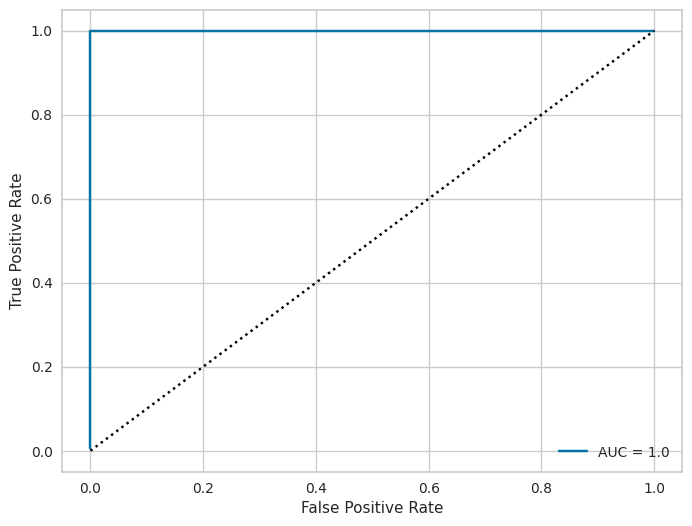

In [42]:
plt.rcParams["figure.figsize"] = [8, 6]
rocCoordinates = modelPerformance.roc()
plt.plot(rocCoordinates[0], rocCoordinates[1], label = "AUC = " + str(modelPerformance.auc()))
plt.plot([0, 1], [0, 1], linestyle = "dotted", color = "black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

##### Plot variable importance.

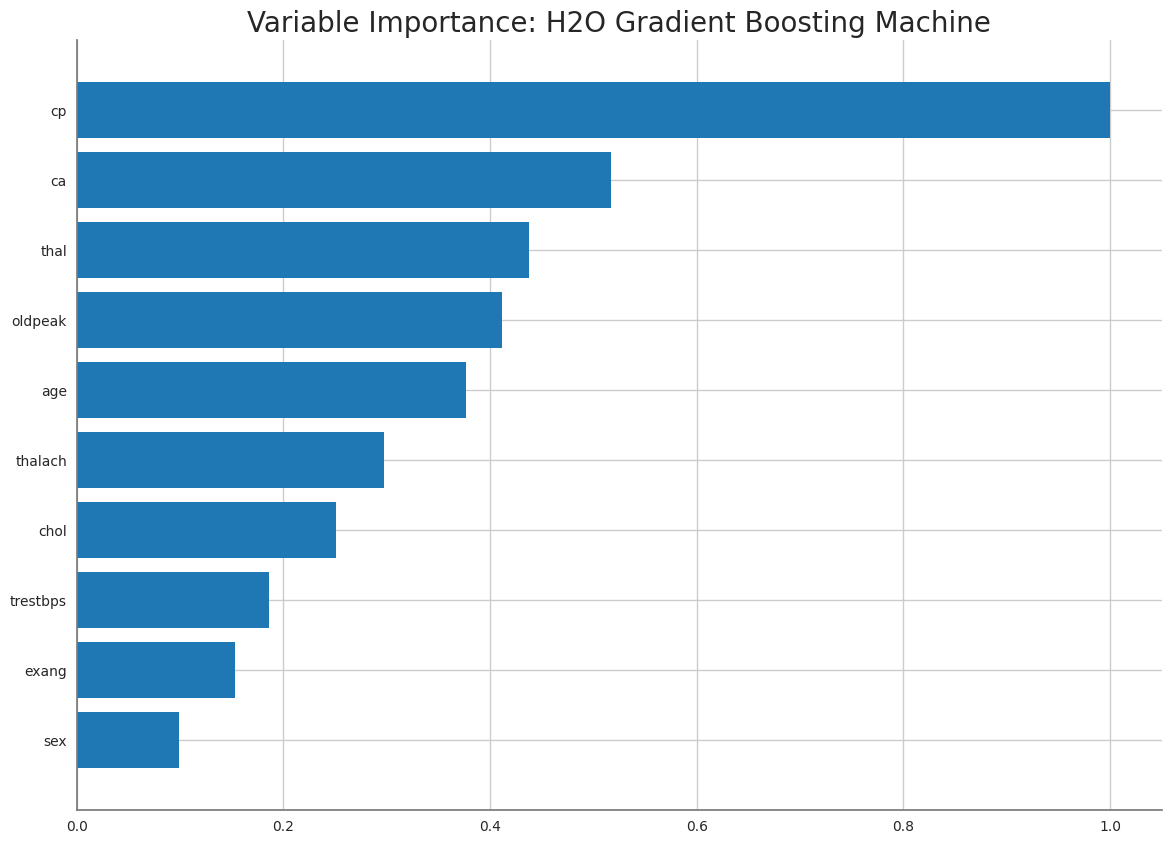

<Figure size 800x600 with 0 Axes>

In [43]:
h2oAutomlBestModel.varimp_plot()
plt.show()

##### Save best model.

In [44]:
h2oAutomlBestModel.save_mojo(path + "h2oAutomlBestModel.zip")

'/content/gdrive/MyDrive/Colab Notebooks/003_autoML/h2oAutomlBestModel.zip/GBM_3_AutoML_1_20241104_41520.zip'

##### Load best model.

In [45]:
loadedH2oAutomlBestModel = h2o.import_mojo(path + "h2oAutomlBestModel.zip")

generic Model Build progress: |██████████████████████████████████████████████████| (done) 100%


Back to the list of [**section links**](#0)

$\hspace{1in}$

<a name="3"></a>
##### **PyCaret**

##### Initialize the training environment.

In [46]:
trainingEnv = setup(trainSet, target = "target", index = False, test_data = testSet, ordinal_features = {"slope": [0, 1, 2], "ca": [0, 1, 2, 3, 4]},
                    numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak"],  categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "thal"],
                    session_id = 1)

##### Train and compare models, and choose the best model.

In [47]:
pyCaretBestModel = compare_models()
pyCaretBestModel

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=1, splitter='best')

##### Predict on test set.

In [48]:
testSetPredictions = predict_model(pyCaretBestModel)
testSetPredictions.head()

age  sex cp  trestbps  chol  fbs restecg  thalach  exang  oldpeak  \
1025   63    1  3       145   233    1       0      150      0   2.3000   
1026   37    1  2       130   250    0       1      187      0   3.5000   
1027   41    0  1       130   204    0       0      172      0   1.4000   
1028   56    1  1       120   236    0       1      178      0   0.8000   
1029   57    0  0       120   354    0       1      163      1   0.6000   

      slope  ca thal  target  prediction_label  prediction_score  
1025      0   0    1       1                 1            1.0000  
1026      0   0    2       1                 1            1.0000  
1027      2   0    2       1                 1            1.0000  
1028      2   0    2       1                 1            1.0000  
1029      2   0    2       1                 1            1.0000

##### Plot confusion matrix.

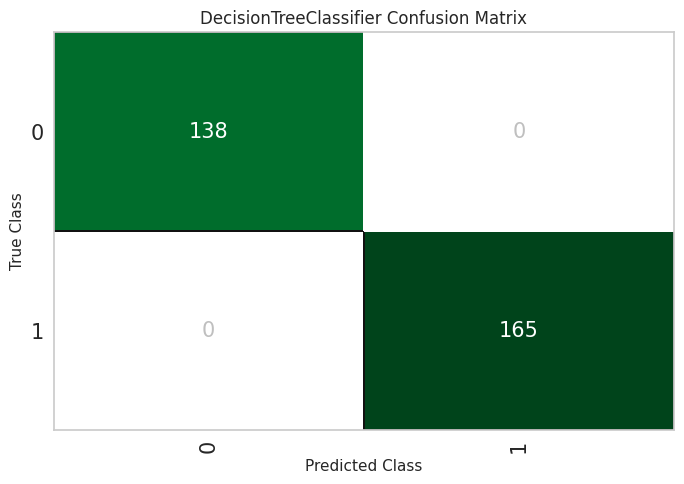

In [49]:
plt.rcParams["figure.figsize"] = [7, 5]
plot_model(pyCaretBestModel, plot = "confusion_matrix")

##### Plot ROC curve.

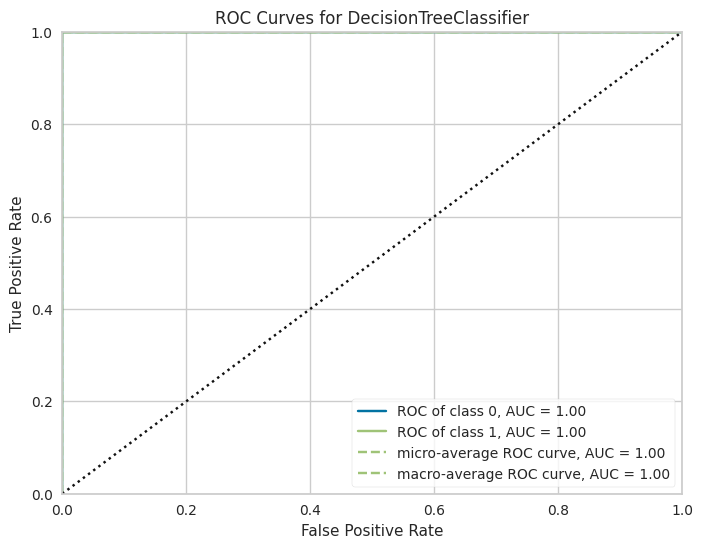

In [50]:
plt.rcParams["figure.figsize"] = [8, 6]
plot_model(pyCaretBestModel, plot = "auc")

##### Plot feature importance.

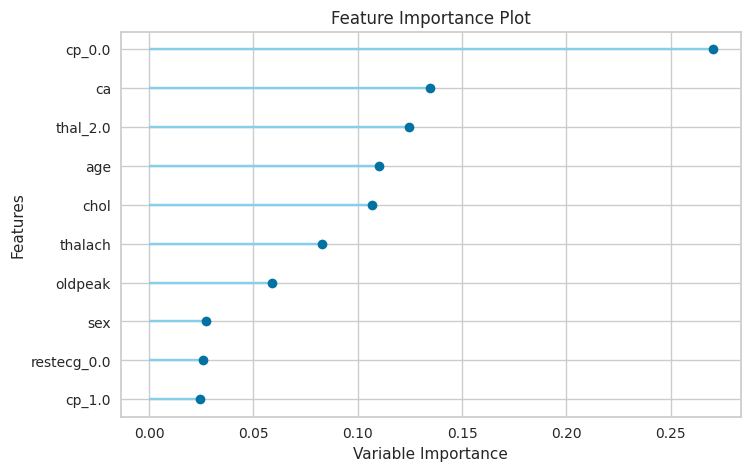

In [51]:
plot_model(pyCaretBestModel, plot = "feature")

##### Save pipeline and best model.

In [52]:
save_model(pyCaretBestModel, path + "pyCaretBestModel")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'trestbps', 'chol',
                                              'thalach', 'oldpeak'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     include...
                                                               return_df=True,
               

##### Load pipeline and best model.

In [53]:
loadedPyCaretBestModel = load_model(path + "pyCaretBestModel")
loadedPyCaretBestModel

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'trestbps', 'chol',
                                             'thalach', 'oldpeak'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=N...
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, random_state=1,
                                        splitter='best'))],
         verbose=False)

Back to the list of [**section links**](#0)

$\hspace{1in}$

<a name="4"></a>
##### **TPOT**

##### Build a one-hot encoding in the train and test sets of each of the nonbinary features that will be treated as categorical.

In [54]:
oneHotEncodedTrainSet = pd.get_dummies(trainSet, columns = ["cp", "restecg", "thal"], drop_first = True)
oneHotEncodedTrainSet.head()

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  slope  ca  target  \
0   52    1       125   212    0      168      0   1.0000      2   2       0   
1   53    1       140   203    1      155      1   3.1000      0   0       0   
2   70    1       145   174    0      125      1   2.6000      0   0       0   
3   61    1       148   203    0      161      0   0.0000      2   1       0   
4   62    0       138   294    1      106      0   1.9000      1   3       0   

    cp_1   cp_2   cp_3  restecg_1  restecg_2  thal_1  thal_2  thal_3  
0  False  False  False       True      False   False   False    True  
1  False  False  False      False      False   False   False    True  
2  False  False  False       True      False   False   False    True  
3  False  False  False       True      False   False   False    True  
4  False  False  False       True      False   False    True   False

In [55]:
oneHotEncodedTestSet = pd.get_dummies(testSet, columns = ["cp", "restecg", "thal"], drop_first = True)
oneHotEncodedTestSet.head()

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  slope  ca  target  \
0   63    1       145   233    1      150      0   2.3000      0   0       1   
1   37    1       130   250    0      187      0   3.5000      0   0       1   
2   41    0       130   204    0      172      0   1.4000      2   0       1   
3   56    1       120   236    0      178      0   0.8000      2   0       1   
4   57    0       120   354    0      163      1   0.6000      2   0       1   

    cp_1   cp_2   cp_3  restecg_1  restecg_2  thal_1  thal_2  thal_3  
0  False  False   True      False      False    True   False   False  
1  False   True  False       True      False   False    True   False  
2   True  False  False      False      False   False    True   False  
3   True  False  False       True      False   False    True   False  
4  False  False  False       True      False   False    True   False

##### Create models, fit them to the training set, and choose the best model.

In [56]:
pipelineOptimizer = TPOTClassifier(generations = 20, population_size = 20, cv = 10, random_state = 1, verbosity = 2)

xTrain = oneHotEncodedTrainSet.drop(columns = ["target"])
yTrain = oneHotEncodedTrainSet["target"]
pipelineOptimizer.fit(xTrain, yTrain)

Optimization Progress:   0%|          | 0/420 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9941747572815534

Generation 2 - Current best internal CV score: 0.9941747572815534

Generation 3 - Current best internal CV score: 0.9970588235294118

Generation 4 - Current best internal CV score: 0.9970588235294118

Generation 5 - Current best internal CV score: 0.9970873786407767

Generation 6 - Current best internal CV score: 0.9970873786407767

Generation 7 - Current best internal CV score: 0.9970873786407767

Generation 8 - Current best internal CV score: 0.9970873786407767

Generation 9 - Current best internal CV score: 0.9970873786407767

Generation 10 - Current best internal CV score: 0.9970873786407767

Generation 11 - Current best internal CV score: 0.9970873786407767

Generation 12 - Current best internal CV score: 0.9970873786407767

Generation 13 - Current best internal CV score: 0.9970873786407767

Generation 14 - Current best internal CV score: 0.9970873786407767

Generation 15 - Current best internal CV score: 0.997087

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=10,
               disable_update_check=False, early_stop=None, generations=20,
               log_file=None, max_eval_time_mins=5, max_time_mins=None,
               memory=None, mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=1, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

##### Display all the pipelines that were evaluated during the pipeline optimization process.

In [57]:
evaluatedPipelines = pd.DataFrame(pipelineOptimizer.evaluated_individuals_).T
evaluatedPipelines

generation  \
DecisionTreeClassifier(RBFSampler(input_matrix, RBFSampler__gamma=0.4), DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=10, DecisionTreeClassifier__min_samples_leaf=12, DecisionTreeClassifier__min_samples_split=7)                                                                                                                                                                                                                                                                                 0   
KNeighborsClassifier(VarianceThreshold(input_matrix, VarianceThreshold__threshold=0.01), KNeighborsClassifier__n_neighbors=15, KNeighborsClassifier__p=1, KNeighborsClassifier__weights=distance)                                                                                                                                                                                                                                                                                                                                  0   
LinearSVC(input_matrix, LinearSVC__C=5.0, LinearSVC__dual=True, LinearSVC__loss=squared_hinge, LinearSVC__penalty=l2, LinearSVC__tol=0.0001)                                                                                                                                                                                                                                                                                                                                                                                       0   
XGBClassifier(DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=2, DecisionTreeClassifier__min_samples_leaf=13, DecisionTreeClassifier__min_samples_split=8), XGBClassifier__learning_rate=0.5, XGBClassifier__max_depth=4, XGBClassifier__min_child_weight=13, XGBClassifier__n_estimators=100, XGBClassifier__n_jobs=1, XGBClassifier__subsample=0.9500000000000001, XGBClassifier__verbosity=0)                                                                 0   
LinearSVC(PCA(input_matrix, PCA__iterated_power=9, PCA__svd_solver=randomized), LinearSVC__C=10.0, LinearSVC__dual=True, LinearSVC__loss=squared_hinge, LinearSVC__penalty=l2, LinearSVC__tol=0.001)                                                                                                                                                                                                                                                                                                                               0   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ...   
MLPClassifier(CombineDFs(input_matrix, input_matrix), MLPClassifier__alpha=0.0001, MLPClassifier__learning_rate_init=0.01)                                                                                                                                                                                                                                                                                                                                                                                                        20   
GradientBoostingClassifier(LinearSVC(input_matrix, LinearSVC__C=0.01, LinearSVC__dual=False, LinearSVC__loss=squared_hinge, LinearSVC__penalty=l2, LinearSVC__tol=0.01), GradientBoostingClassifier__learning_rate=0.001, GradientBoostingClassifier__max_depth=4, GradientBoostingClassifier__max_features=0.9000000000000001, GradientBoostingClassifier

##### Display the best pipeline and model.

In [58]:
tpotBestModel = pipelineOptimizer.fitted_pipeline_
tpotBestModel

Pipeline(memory=None,
         steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None,
                                        max_features=0.9500000000000001,
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=4,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=None, oob_score=False,
                                        random_state=1, verbose=0,
                                        warm_start=False))],
         verbose=False)

##### Predict on test set.

In [59]:
xTest = oneHotEncodedTestSet.drop(columns = ["target"])
predictionLabels = tpotBestModel.predict(xTest)
predictionScores = tpotBestModel.predict_proba(xTest)[:, 1]

testSetPredictions = xTest.copy()
testSetPredictions["prediction_label"] = predictionLabels
testSetPredictions["prediction_score"] = predictionScores
testSetPredictions.head()

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  slope  ca   cp_1  \
0   63    1       145   233    1      150      0   2.3000      0   0  False   
1   37    1       130   250    0      187      0   3.5000      0   0  False   
2   41    0       130   204    0      172      0   1.4000      2   0   True   
3   56    1       120   236    0      178      0   0.8000      2   0   True   
4   57    0       120   354    0      163      1   0.6000      2   0  False   

    cp_2   cp_3  restecg_1  restecg_2  thal_1  thal_2  thal_3  \
0  False   True      False      False    True   False   False   
1   True  False       True      False   False    True   False   
2  False  False      False      False   False    True   False   
3  False  False       True      False   False    True   False   
4  False  False       True      False   False    True   False   

   prediction_label  prediction_score  
0                 1            1.0000  
1                 1            1.0000  
2                 1            1.0000  
3                 1            1.0000  
4                 1            1.0000

##### Plot confusion matrix.

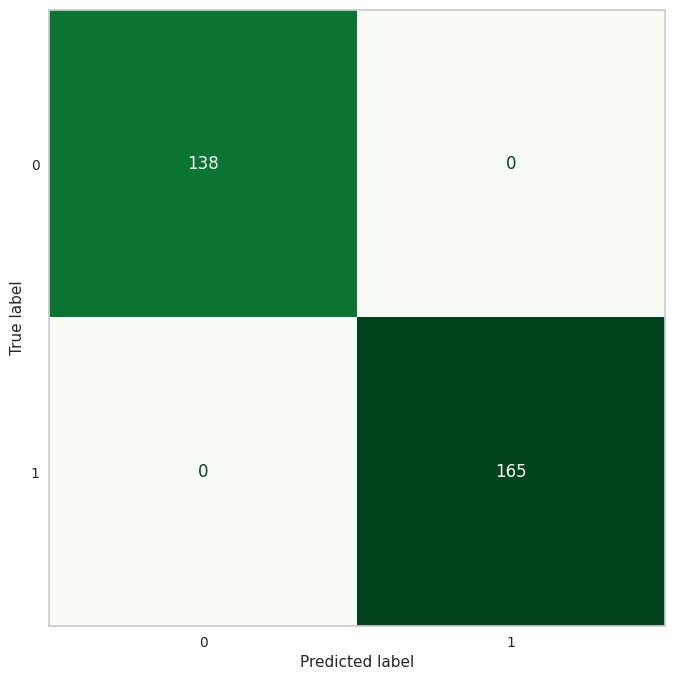

In [60]:
yTest = oneHotEncodedTestSet["target"]
yPred = testSetPredictions["prediction_label"]
confusionMatrix = metrics.confusion_matrix(yTest, yPred)

plt.rcParams["figure.figsize"] = [12, 8]
display = metrics.ConfusionMatrixDisplay(confusionMatrix)
display.plot(cmap = plt.cm.Greens, colorbar = False)
plt.grid(None)
plt.show()

##### Plot ROC curve.

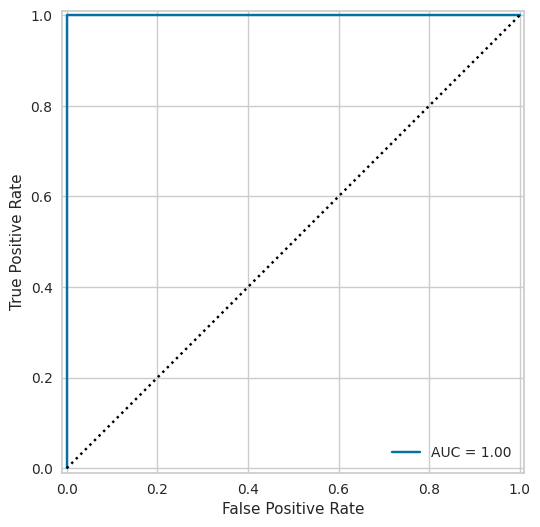

In [61]:
plt.rcParams["figure.figsize"] = [8, 6]
fpr, tpr, thresholds = metrics.roc_curve(yTest, predictionScores)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc)
display.plot()
plt.plot([0, 1], [0, 1], linestyle = "dotted", color = "black")
plt.show()

##### Plot permutation importance of the features.

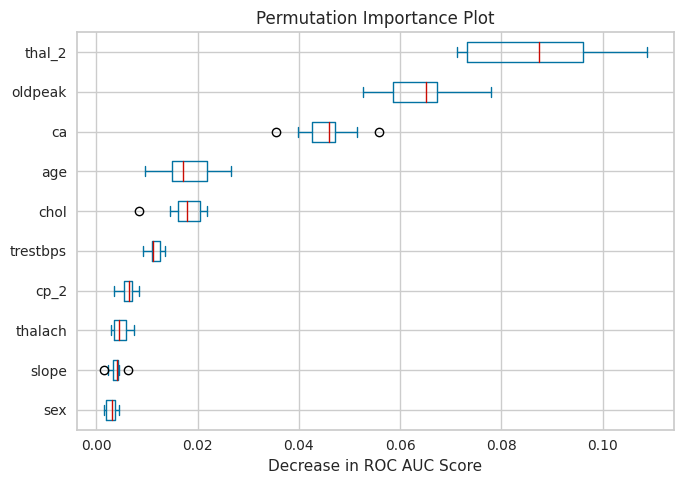

In [62]:
result = permutation_importance(tpotBestModel, xTest, yTest, n_repeats = 10, random_state = 1, scoring = "roc_auc")
sortedIdx = result.importances_mean.argsort()
importances = pd.DataFrame(result.importances[sortedIdx].T, columns = xTest.columns[sortedIdx])
columns = list(importances.columns)
topImportances = importances[columns[(len(columns) - 10):]]

plt.rcParams["figure.figsize"] = [7, 5]
ax = topImportances.plot.box(vert = False)
ax.set_title("Permutation Importance Plot")
ax.set_xlabel("Decrease in ROC AUC Score")
ax.figure.tight_layout()

##### Save best pipeline and model.

In [63]:
pickle.dump(tpotBestModel, open(path + "tpotBestModel.pkl", "wb"))

##### Load best pipeline and model.

In [64]:
loadedTpotBestModel = pickle.load(open(path + "tpotBestModel.pkl", "rb"))

Back to the list of [**section links**](#0)